# Aula 1 - Mão na massa

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/prever-phishing.zip')

In [22]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [23]:
df['Email Type'].unique()

array(['Safe Email', 'Phishing Email'], dtype=object)

In [24]:
import matplotlib.pyplot as plt

email_counts = df['Email Type'].value_counts()

<Axes: xlabel='Email Type'>

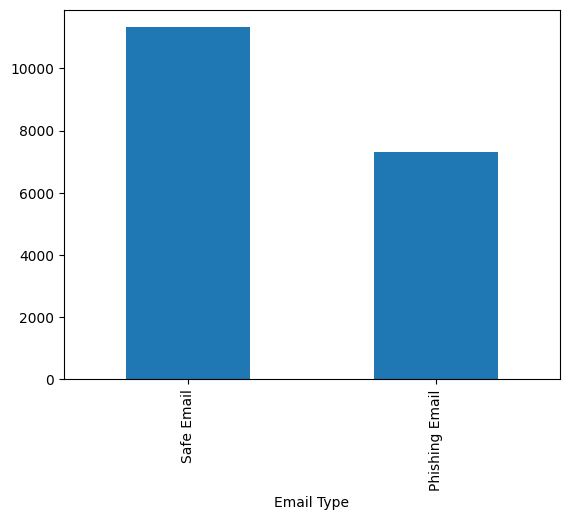

In [25]:
email_counts.plot(kind='bar')


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_treino, X_teste, y_treino,y_teste = train_test_split(df['Email Text'].values, df['Email Type'].values, test_size=0.2, stratify=df['Email Type'].values, random_state=4266)

In [28]:
import tensorflow as tf

In [29]:
VOCAB_SIZE = 1000

In [30]:
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)

In [38]:
X_treino_str = [str(x) for x in X_treino]

In [37]:
encoder.adapt(X_treino_str)

2024-06-25 17:53:47.961739: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 105208784 exceeds 10% of free system memory.
2024-06-25 17:53:47.961794: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 157813176 exceeds 10% of free system memory.
2024-06-25 17:53:48.216085: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52604392 exceeds 10% of free system memory.
2024-06-25 17:53:48.275756: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26302196 exceeds 10% of free system memory.
2024-06-25 17:53:48.313038: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52604392 exceeds 10% of free system memory.


In [44]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

In [45]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
X_teste_str[5:6]

["\n------=_NextPart_000_6395_000076C1.00005D45\nContent-Type: text/html;\n See the VIDEO Britney Wants BANNED!\nSTOLEN HOME VIDEO OF BRITNEY SPEARS\n& WE HAVE THE VIDEOTAPE!!!!\n CLICK HERE!Britney Caught With Her Mouth Full!\nhttp://members.tripod.co.uk/hannah782________________________________\nScreening of addresses \nhas been done to the best \nof our technical ability.\nWe respect all removal requests.If You Don't Want To Receive This Email Again\nThen Simply Click The Following Link To Be Removed!\n(You Must Click It To Be Removed) REMOVE ME! See the VIDEO Britney Wants BANNED!STOLEN HOME VIDEO OF BRITNEY SPEARS\n"]

In [63]:
modelo.predict(X_teste[5:6])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.24991938, 0.2510359 , 0.2489089 , 0.2501358 ]], dtype=float32)

In [57]:
import numpy as np

In [59]:
# Supondo que você tem as classes em um array
classes = np.unique(df['Email Type'].values)

# Verifique o mapeamento (opcional, apenas para garantir que sabemos a correspondência)
print("Índices e classes correspondentes:")
for i, cls in enumerate(classes):
    print(f"Índice {i}: {cls}")

indice_previsto = modelo.predict(X_teste[5:6]).argmax(axis=1)[0]


print(f"Classe prevista: {classes[indice_previsto]}")

Índices e classes correspondentes:
Índice 0: Phishing Email
Índice 1: Safe Email
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Classe prevista: Safe Email


In [61]:
y_teste[5]

'Phishing Email'